# Visualize BioRxiv Document Embeddings

This notebook is designed to visualize umap and tsne representations of bioRxiv document embeddings.
Each document embedding is generated via an average of every word in a given article.

In [1]:
import itertools
from pathlib import Path
import re

import pandas as pd
import plotnine as p9

In [2]:
journal_map_df = pd.read_csv(
    "../exploratory_data_analysis/output/biorxiv_article_metadata.tsv", sep="\t"
)
journal_map_df.head()

,author_type,heading,category,document,doi
0,regular article,new results,genetics,440735_v1.xml,10.1101/440735
1,regular article,new results,systems biology,775270_v1.xml,10.1101/775270
2,regular article,new results,genetics,242404_v1.xml,10.1101/242404
3,regular article,new results,neuroscience,872994_v1.xml,10.1101/2019.12.11.872994
4,regular article,new results,developmental biology,080853_v2.xml,10.1101/080853


In [3]:
biorxiv_umap_models = {
    int(re.search(r"(\d+)", str(file)).group(1)): pd.read_csv(str(file), sep="\t")
    for file in Path().rglob("output/embedding_output/umap/biorxiv_umap*tsv")
}

# Keep only current versions of articles
biorxiv_umap_models_lastest = {
    key: (
        biorxiv_umap_models[key]
        .groupby("doi")
        .agg(
            {
                "doi": "last",
                "document": "last",
                "umap1": "last",
                "umap2": "last",
                "category": "last",
            }
        )
        .reset_index(drop=True)
    )
    for key in biorxiv_umap_models
}

In [4]:
biorxiv_tsne_models = {
    int(re.search(r"(\d+)", str(file)).group(1)): pd.read_csv(str(file), sep="\t")
    for file in Path().rglob("output/embedding_output/tsne/biorxiv_tsne*tsv")
}

# Keep only current versions of articles
biorxiv_tsne_models_lastest = {
    key: (
        biorxiv_tsne_models[key]
        .groupby("doi")
        .agg(
            {
                "doi": "last",
                "document": "last",
                "tsne1": "last",
                "tsne2": "last",
                "category": "last",
            }
        )
        .reset_index(drop=True)
    )
    for key in biorxiv_tsne_models
}

In [5]:
biorxiv_pca_models = {
    int(re.search(r"(\d+)", str(file)).group(1)): pd.read_csv(str(file), sep="\t")
    for file in Path().rglob("output/embedding_output/pca/biorxiv_pca*tsv")
}

# Keep only current versions of articles
biorxiv_pca_models_lastest = {
    key: (
        biorxiv_pca_models[key]
        .groupby("doi")
        .agg(
            {
                "doi": "last",
                "document": "last",
                "pca1": "last",
                "pca2": "last",
                "category": "last",
            }
        )
        .reset_index(drop=True)
    )
    for key in biorxiv_pca_models
}

# UMAP of the Documents

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/embedding_output/umap/figures/biorxiv_umap_150.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


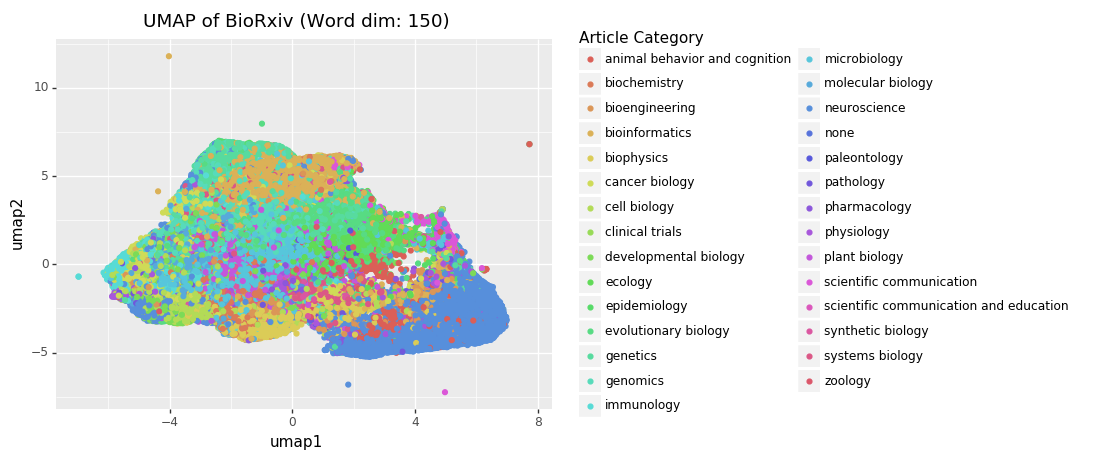

<ggplot: (-9223363304465408375)>


In [6]:
g = (
    p9.ggplot(biorxiv_umap_models_lastest[150])
    + p9.aes(x="umap1", y="umap2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(title="UMAP of BioRxiv (Word dim: 150)", color="Article Category")
)
g.save("output/embedding_output/umap/figures/biorxiv_umap_150.png", dpi=500)
print(g)

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/embedding_output/umap/figures/biorxiv_umap_250.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


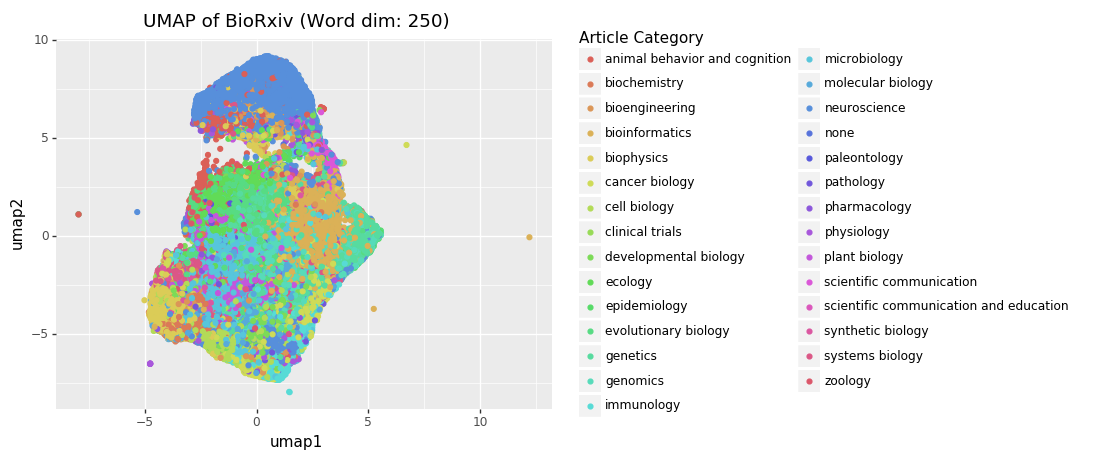

<ggplot: (8732382722743)>


In [7]:
g = (
    p9.ggplot(biorxiv_umap_models_lastest[250])
    + p9.aes(x="umap1", y="umap2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(title="UMAP of BioRxiv (Word dim: 250)", color="Article Category")
)
g.save("output/embedding_output/umap/figures/biorxiv_umap_250.png", dpi=500)
print(g)

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/embedding_output/umap/figures/biorxiv_umap_300.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


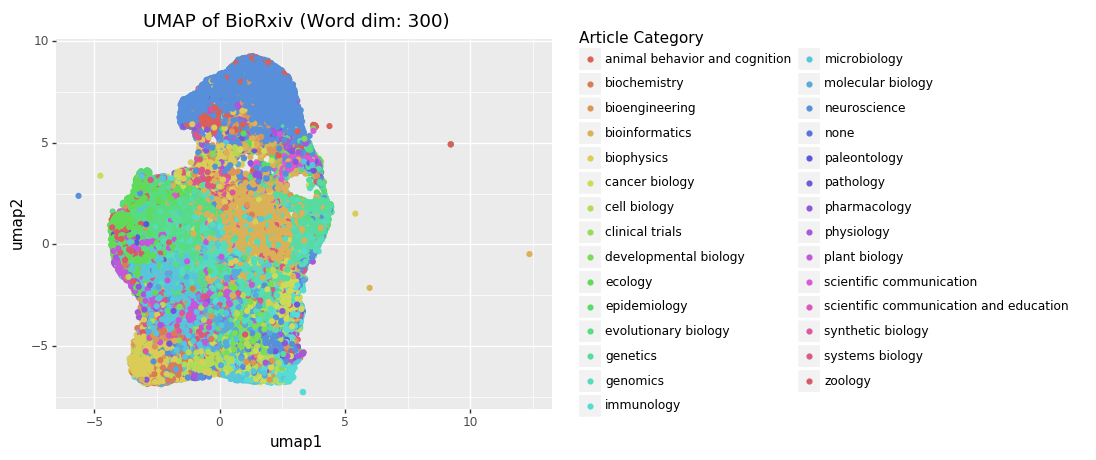

<ggplot: (8732387043129)>


In [8]:
g = (
    p9.ggplot(biorxiv_umap_models_lastest[300])
    + p9.aes(x="umap1", y="umap2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(title="UMAP of BioRxiv (Word dim: 300)", color="Article Category")
)
g.save("output/embedding_output/umap/figures/biorxiv_umap_300.png", dpi=500)
print(g)

Looking at the plots it seems that documents in the same category mostly cluster together, which is expected. The plots appear to be rotated versions of each other, which suggests that dimensionality doesn't hugely affect umap's results. Interesting cases are the outliers that appear within the plot. Question that arises: what are those outliers?

## UMAP Outliers

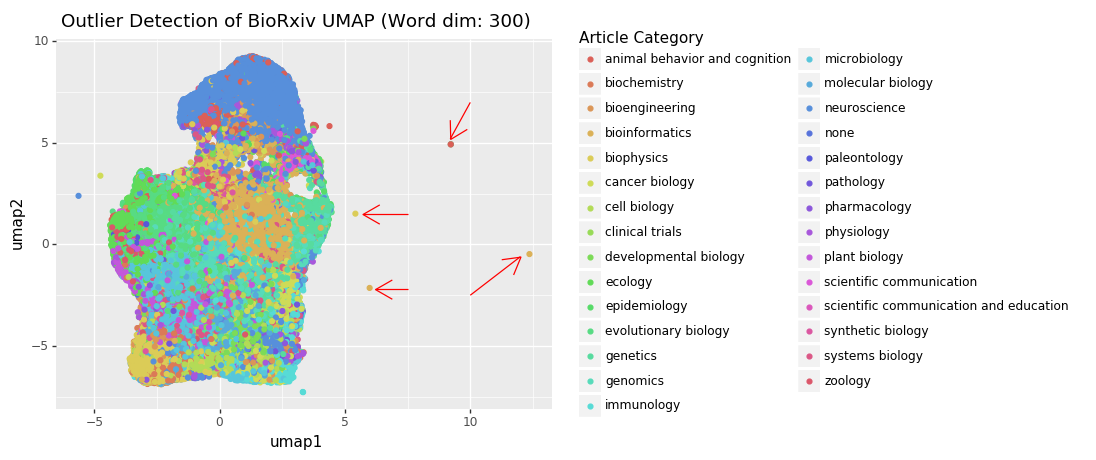

<ggplot: (8732386339518)>


In [9]:
g = (
    p9.ggplot(biorxiv_umap_models_lastest[300])
    + p9.aes(x="umap1", y="umap2", color="factor(category)")
    + p9.geom_point()
    + p9.annotate(
        "segment", x=10, y=7, xend=9.2, yend=5.2, arrow=p9.arrow(), color="red"
    )
    + p9.annotate(
        "segment", x=10, y=-2.5, xend=12, yend=-0.6, arrow=p9.arrow(), color="red"
    )
    + p9.annotate(
        "segment", x=7.5, y=-2.2, xend=6.2, yend=-2.2, arrow=p9.arrow(), color="red"
    )
    + p9.annotate(
        "segment", x=7.5, y=1.5, xend=5.7, yend=1.5, arrow=p9.arrow(), color="red"
    )
    + p9.labs(
        title="Outlier Detection of BioRxiv UMAP (Word dim: 300)",
        color="Article Category",
    )
)
print(g)

In [10]:
(biorxiv_umap_models_lastest[300].query("umap1 > 5"))

,doi,document,umap1,umap2,category
3492,10.1101/045062,045062_v1.xml,9.221600,4.933906,animal behavior and cognition
3537,10.1101/045666,045666_v2.xml,9.223084,4.934769,genetics
5099,10.1101/066423,066423_v12.xml,9.220531,4.932404,animal behavior and cognition
26514,10.1101/290825,290825_v3.xml,12.359201,-0.473870,bioinformatics
33868,10.1101/384511,384511_v9.xml,5.415733,1.518634,biophysics
50377,10.1101/599225,599225_v2.xml,5.984427,-2.141160,bioinformatics


Using the doi link (doi.org/doi url) so far the bioinformatics papers should be reclassified as Epigenetics (10.1101/290825) and Cancer biology (10.1101/599225). The animal behavior and cognition category (10.1101/066423 and 10.1101/045062) has shockingly similar titles, which means I found a duplicate of preprints. The articles have two different ids, but have the same authors and unsurprisingly close titles. Lastly, the genetics (10.1101/045666) preprint sounds like it should be a neuroscience preprint. So far it seems like the outliers are category errors/mysterious duplication.

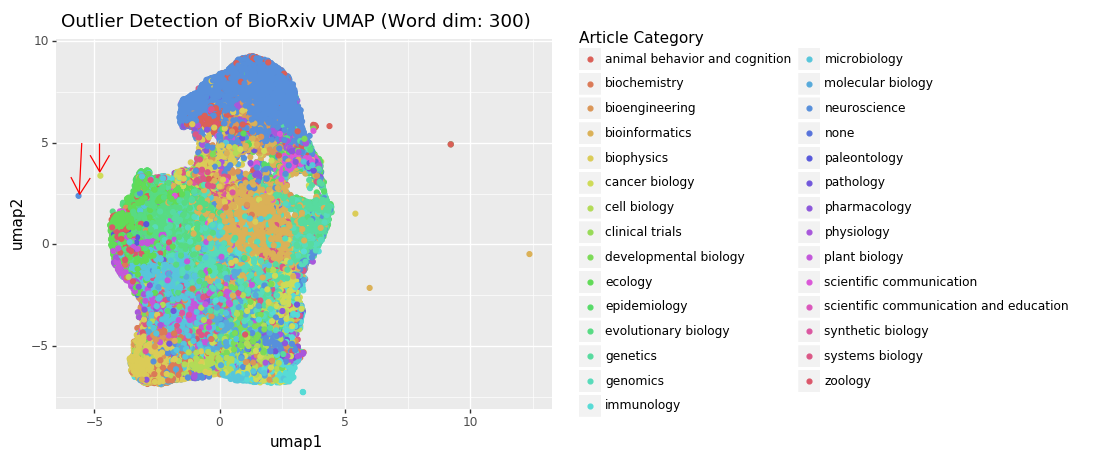

<ggplot: (-9223363304467704453)>


In [11]:
g = (
    p9.ggplot(biorxiv_umap_models_lastest[300])
    + p9.aes(x="umap1", y="umap2", color="factor(category)")
    + p9.geom_point()
    + p9.annotate(
        "segment", x=-5.5, y=5, xend=-5.6, yend=2.5, arrow=p9.arrow(), color="red"
    )
    + p9.annotate(
        "segment", x=-4.8, y=5, xend=-4.8, yend=3.6, arrow=p9.arrow(), color="red"
    )
    + p9.labs(
        title="Outlier Detection of BioRxiv UMAP (Word dim: 300)",
        color="Article Category",
    )
)
print(g)

In [12]:
(biorxiv_umap_models_lastest[300].query("umap1 < -4.5"))

,doi,document,umap1,umap2,category
2644,10.1101/034132,034132_v1.xml,-4.756767,3.387901,cancer biology
2671,10.1101/034413,034413_v1.xml,-5.628371,2.395830,neuroscience


This article is mainly about evolutionary biology; however, it discusses intellegency quotient (IQ). This means the outlier is a combination of both fields; hence the point is in close proximity of the evolutionary biology section. The cancer biology preprint (10.1101/034132) seems like a biophysics paper or something to that nature.

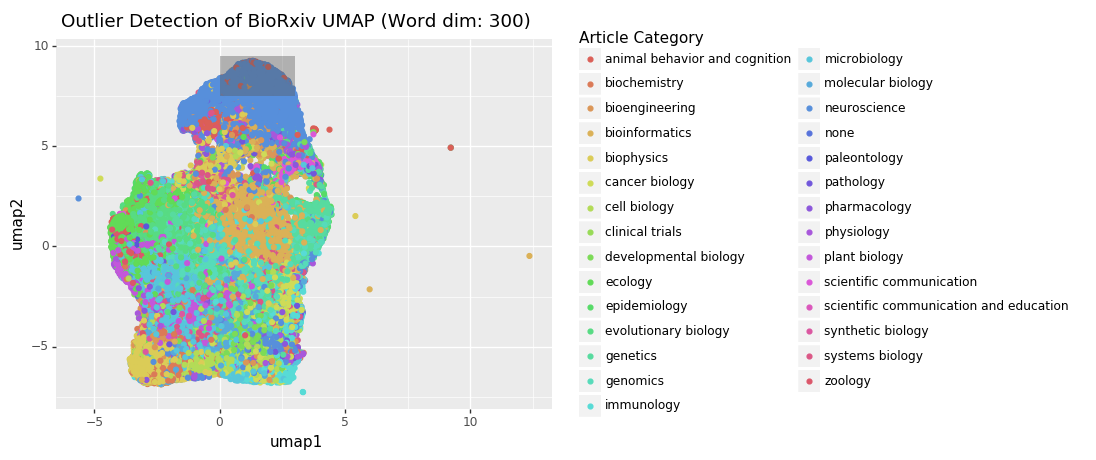

<ggplot: (8732386341212)>


In [13]:
g = (
    p9.ggplot(biorxiv_umap_models_lastest[300])
    + p9.aes(x="umap1", y="umap2", color="factor(category)")
    + p9.geom_point()
    + p9.annotate("rect", xmin=0, xmax=3, ymin=7.5, ymax=9.5, alpha=0.4)
    + p9.labs(
        title="Outlier Detection of BioRxiv UMAP (Word dim: 300)",
        color="Article Category",
    )
)
print(g)

In [14]:
(
    biorxiv_umap_models_lastest[300]
    .query("umap1 > 0 & umap1 <= 3")
    .query("umap2 > 7.5")
    .query("category=='bioinformatics'")
)

,doi,document,umap1,umap2,category
3020,10.1101/038919,038919_v1.xml,0.514867,8.812214,bioinformatics
12973,10.1101/166603,166603_v1.xml,1.869867,7.650521,bioinformatics
13613,10.1101/174524,174524_v1.xml,0.563408,8.732258,bioinformatics
16370,10.1101/2019.12.17.880237,880237_v1.xml,0.528499,7.790659,bioinformatics
18049,10.1101/2020.01.11.899831,899831_v1.xml,1.889212,7.594207,bioinformatics
20450,10.1101/212423,212423_v1.xml,0.108774,8.063037,bioinformatics
26074,10.1101/285221,285221_v2.xml,1.389390,9.180244,bioinformatics
48045,10.1101/569236,569236_v1.xml,0.453850,7.506328,bioinformatics
54937,10.1101/658252,658252_v1.xml,0.784265,8.843632,bioinformatics
68540,10.1101/837641,837641_v1.xml,0.708901,8.917739,bioinformatics


Looking at (10.1101/2020.01.11.899831) it sounds like the authors used word2vec on fMRI documents. This is bioinformatics; however, I'd argue that this could fall under neuroscience. Plus (10.1101/038919) should be a neuroscience paper since it involves statistical modeling of multitasking behavior. From what I'm gathering majority of these outliers are papers that fall out of the categorical bounds.

# TSNE of the Documents

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/embedding_output/tsne/figures/biorxiv_tsne_150.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


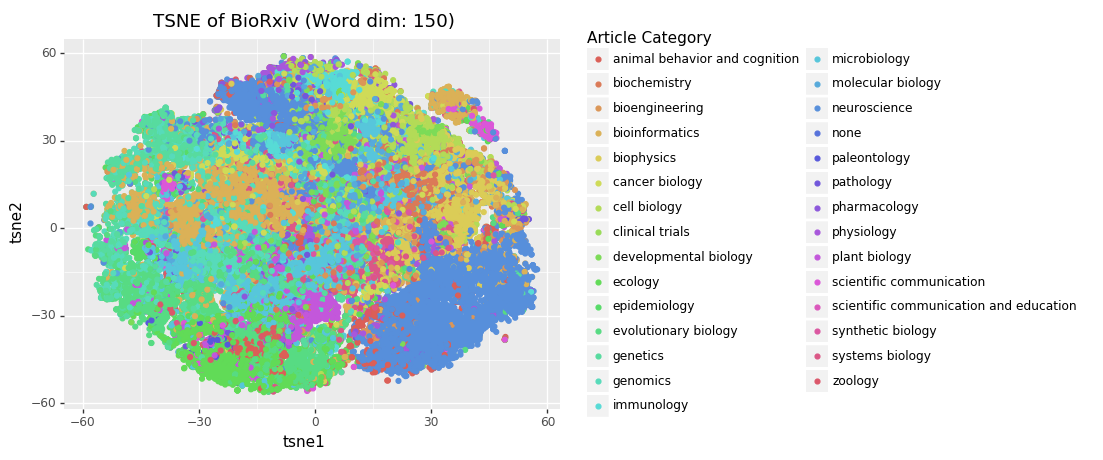

<ggplot: (-9223363304471016167)>


In [15]:
g = (
    p9.ggplot(biorxiv_tsne_models_lastest[150])
    + p9.aes(x="tsne1", y="tsne2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(title="TSNE of BioRxiv (Word dim: 150)", color="Article Category")
)
g.save("output/embedding_output/tsne/figures/biorxiv_tsne_150.png", dpi=500)
print(g)

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/embedding_output/tsne/figures/biorxiv_tsne_250.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


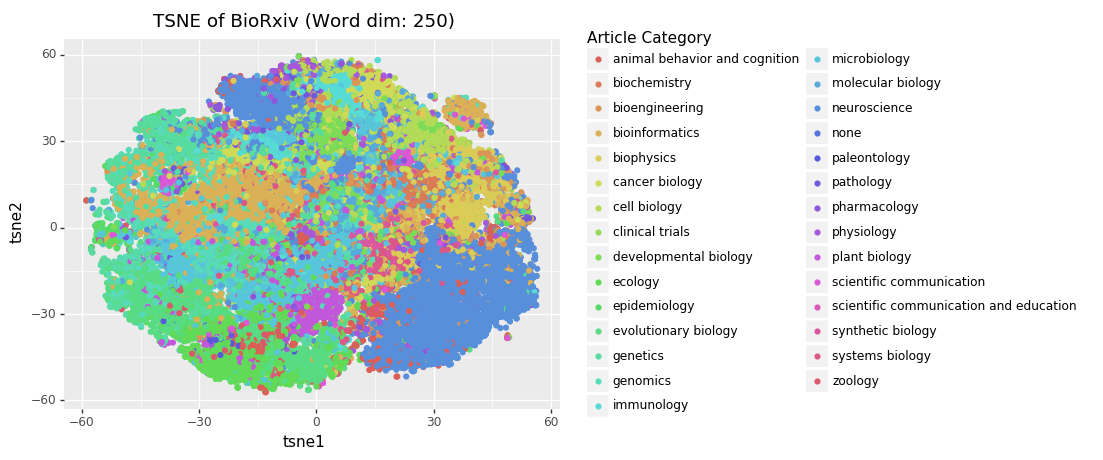

<ggplot: (8732386518462)>


In [16]:
g = (
    p9.ggplot(biorxiv_tsne_models_lastest[250])
    + p9.aes(x="tsne1", y="tsne2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(title="TSNE of BioRxiv (Word dim: 250)", color="Article Category")
)
g.save("output/embedding_output/tsne/figures/biorxiv_tsne_250.png", dpi=500)
print(g)

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/embedding_output/tsne/figures/biorxiv_tsne_300.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


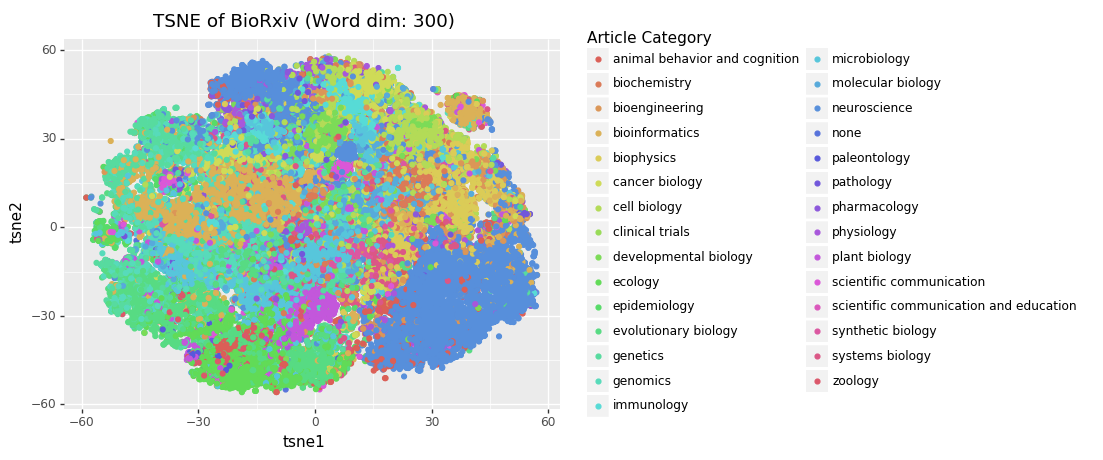

<ggplot: (-9223363304468452520)>


In [17]:
g = (
    p9.ggplot(biorxiv_tsne_models_lastest[300])
    + p9.aes(x="tsne1", y="tsne2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(title="TSNE of BioRxiv (Word dim: 300)", color="Article Category")
)
g.save("output/embedding_output/tsne/figures/biorxiv_tsne_300.png", dpi=500)
print(g)

These plots are similar to each other which results in documents grouping together based on their assigned category. Interestingly, there seems to be a big divide between the neuroscience categories. Plus the bioinformatics papers have a separated blob. Question to follow up on is: why the discrepancies?

## TSNE Outliers

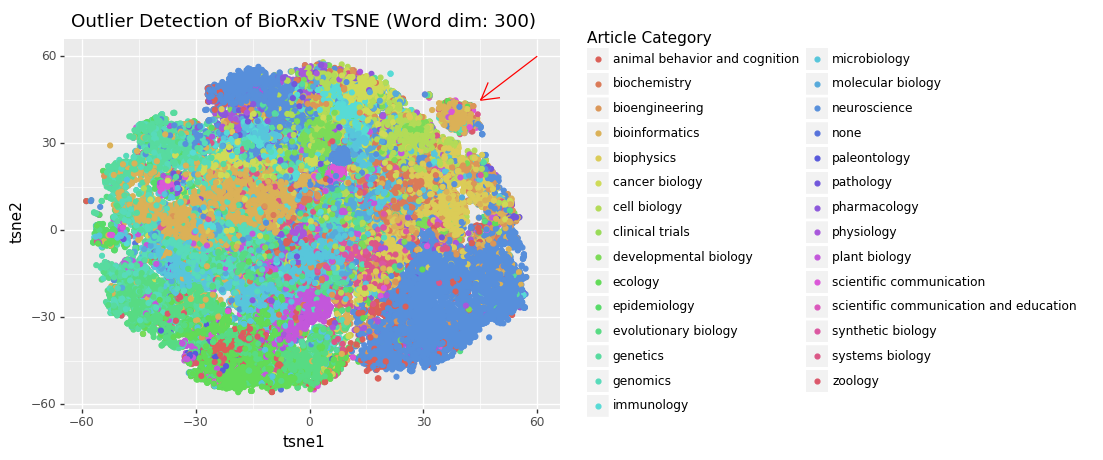

<ggplot: (-9223363304494772501)>


In [18]:
g = (
    p9.ggplot(biorxiv_tsne_models_lastest[300])
    + p9.aes(x="tsne1", y="tsne2", color="factor(category)")
    + p9.geom_point()
    + p9.annotate(
        "segment", x=60, y=60, xend=45, yend=45, arrow=p9.arrow(), color="red"
    )
    + p9.labs(
        title="Outlier Detection of BioRxiv TSNE (Word dim: 300)",
        color="Article Category",
    )
)
print(g)

In [19]:
(
    biorxiv_tsne_models_lastest[300]
    .query("tsne1 > 30 & tsne1 < 45")
    .query("tsne2 > 31 & tsne2 < 45")
    .query("category != 'bioinformatics'")
    .category.value_counts()
)

cell biology                     89
developmental biology            55
genomics                         35
scientific communication         32
biophysics                       32
neuroscience                     28
systems biology                  20
ecology                          15
plant biology                    10
cancer biology                    8
synthetic biology                 8
microbiology                      7
genetics                          7
evolutionary biology              6
bioengineering                    6
epidemiology                      3
zoology                           2
molecular biology                 2
physiology                        1
biochemistry                      1
animal behavior and cognition     1
pharmacology                      1
none                              1
Name: category, dtype: int64

Looking into the bioinformatics blob approximately 370 articles are off category.

In [20]:
(
    biorxiv_tsne_models_lastest[300]
    .query("tsne1 > 30 & tsne1 < 45")
    .query("tsne2 > 31 & tsne2 < 45")
    .query(
        "category in ['pharmacology', 'none', 'physiology', 'biochemistry', 'animal behavior and cognition']"
    )
)

,doi,document,tsne1,tsne2,category
664,10.1101/008896,008896_v1.xml,42.102040,40.108295,none
23090,10.1101/246587,246587_v1.xml,43.026234,38.837850,biochemistry
23275,10.1101/248898,248898_v1.xml,36.532795,42.460472,pharmacology
33352,10.1101/377960,377960_v1.xml,39.223560,42.895310,animal behavior and cognition
47983,10.1101/568386,568386_v1.xml,39.396675,39.216576,physiology


(10.1101/008896) is a bioinformatics and biophysics paper, but the authors didn't provide a category for the preprint. (10.1101/248898) is a preprint that monitors data availability, which suggests that it should have the bioinformatics category as well. (10.1101/377960) should have the bioinformatics category as well.

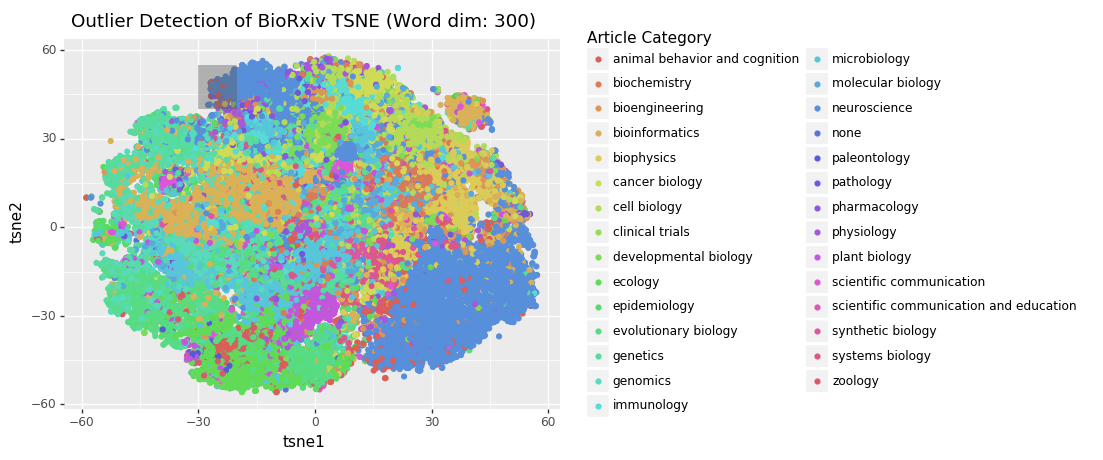

<ggplot: (-9223363304477381281)>


In [21]:
g = (
    p9.ggplot(biorxiv_tsne_models_lastest[300])
    + p9.aes(x="tsne1", y="tsne2", color="factor(category)")
    + p9.geom_point()
    + p9.annotate("rect", xmin=-30, xmax=-20, ymin=40, ymax=55, alpha=0.4)
    + p9.labs(
        title="Outlier Detection of BioRxiv TSNE (Word dim: 300)",
        color="Article Category",
    )
)
print(g)

In [22]:
(
    biorxiv_tsne_models_lastest[300]
    .query("tsne1 > -30 & tsne1 < -20")
    .query("tsne2 > 40 & tsne2 < 55")
    .query("category != 'neuroscience'")
    .category.value_counts()
)

animal behavior and cognition    83
pharmacology                     38
physiology                       22
molecular biology                 4
bioengineering                    3
zoology                           3
genetics                          3
developmental biology             2
scientific communication          2
microbiology                      2
genomics                          1
clinical trials                   1
cancer biology                    1
bioinformatics                    1
biophysics                        1
ecology                           1
Name: category, dtype: int64

Looking into the bioinformatics blob approximately 370 articles are off category.

In [23]:
(
    biorxiv_tsne_models_lastest[300]
    .query("tsne1 > -30 & tsne1 < -20")
    .query("tsne2 > 40 & tsne2 < 55")
    .query(
        "category in ['biophysics', 'genomics', 'bioinformatics', 'clinical trials', 'ecology', 'cancer biology']"
    )
)

,doi,document,tsne1,tsne2,category
4296,10.1101/055699,055699_v1.xml,-20.882267,42.400970,cancer biology
33107,10.1101/374801,374801_v1.xml,-23.410345,40.218204,bioinformatics
34706,10.1101/395293,395293_v1.xml,-23.501038,40.964985,clinical trials
48467,10.1101/574673,574673_v1.xml,-20.259624,43.135975,genomics
57036,10.1101/685529,685529_v1.xml,-21.041029,45.708984,ecology
71027,10.1101/871392,871392_v1.xml,-23.168087,41.741340,biophysics


(10.1101/374801) is a preprint on glucose monitoring in infants. Not sure how this preprint fell into the neurscience category or even in the bioinformatics category.. (10.1101/395293) is about using ultrasound to improve corticosteroid injection. Once again not sure how this paper got grouped with other neuroscience papers. (10.1101/574673) is a preprint about transcriptional profiling of cerebrovascular traits in mice (paraphrased). This paper could also receive a neuroscience label given that the cell location type is neuroscience related.

# PCA of the Documents

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/embedding_output/pca/figures/biorxiv_pca_150.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


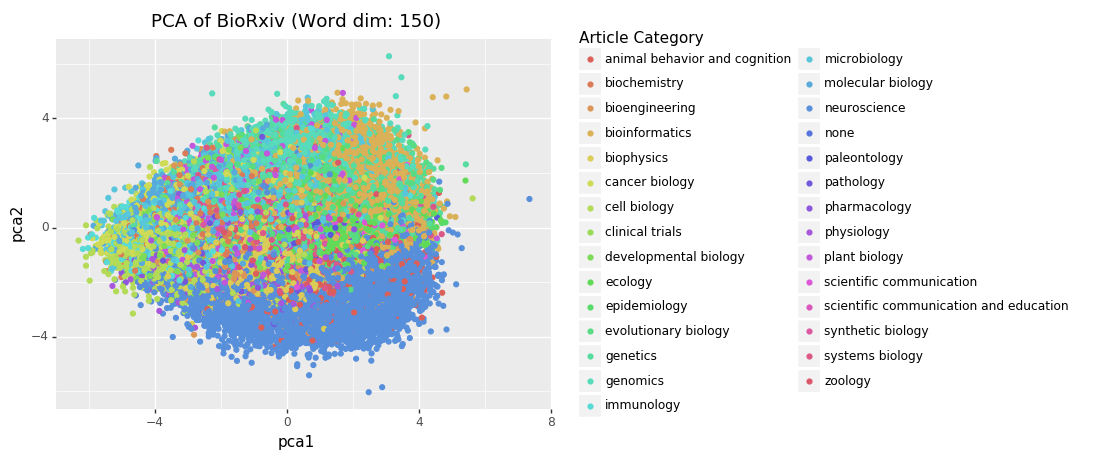

<ggplot: (8732383735325)>


In [24]:
g = (
    p9.ggplot(biorxiv_pca_models_lastest[150])
    + p9.aes(x="pca1", y="pca2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(title="PCA of BioRxiv (Word dim: 150)", color="Article Category")
)
g.save("output/embedding_output/pca/figures/biorxiv_pca_150.png", dpi=500)
print(g)

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/embedding_output/pca/figures/biorxiv_pca_250.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


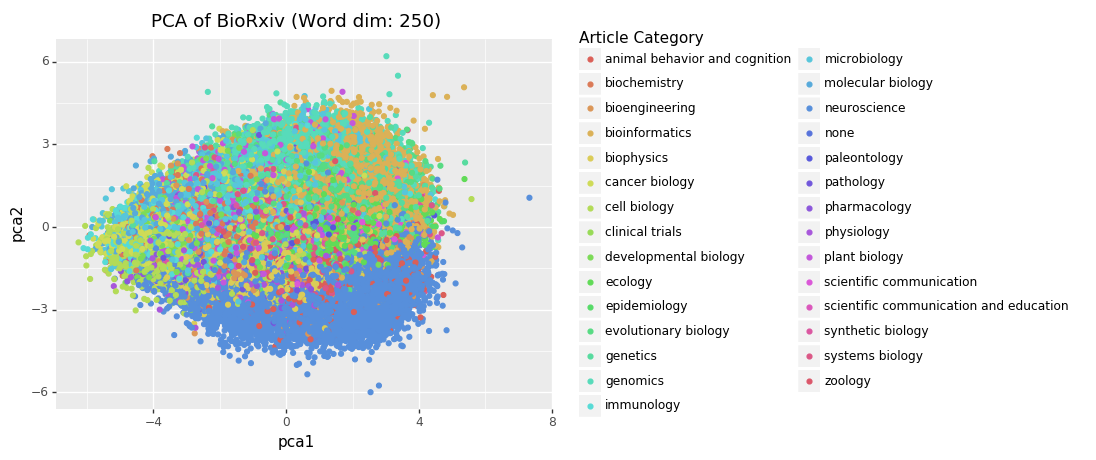

<ggplot: (8732377344625)>


In [25]:
g = (
    p9.ggplot(biorxiv_pca_models_lastest[250])
    + p9.aes(x="pca1", y="pca2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(title="PCA of BioRxiv (Word dim: 250)", color="Article Category")
)
g.save("output/embedding_output/pca/figures/biorxiv_pca_250.png", dpi=500)
print(g)

/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/embedding_output/pca/figures/biorxiv_pca_300.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


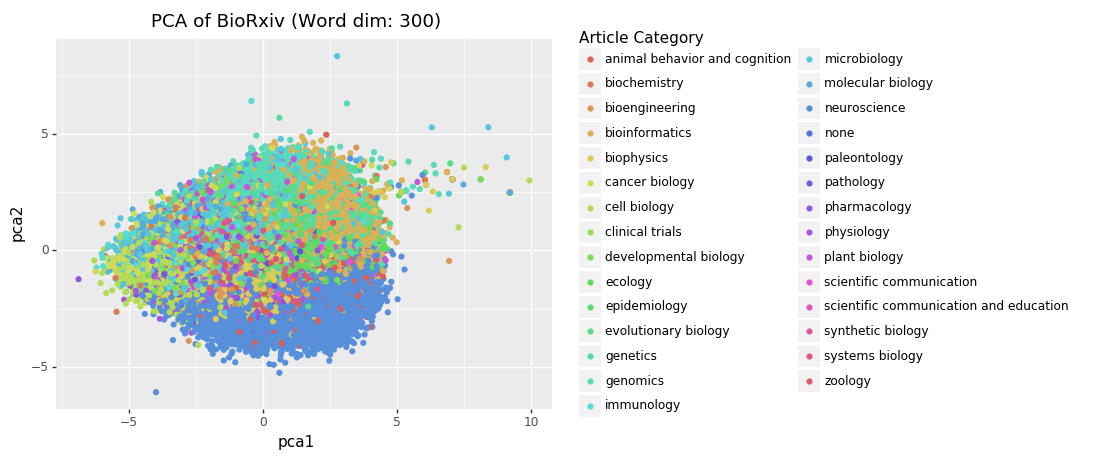

<ggplot: (8732383568879)>


In [26]:
g = (
    p9.ggplot(biorxiv_pca_models_lastest[300])
    + p9.aes(x="pca1", y="pca2", color="factor(category)")
    + p9.geom_point()
    + p9.labs(title="PCA of BioRxiv (Word dim: 300)", color="Article Category")
)
g.save("output/embedding_output/pca/figures/biorxiv_pca_300.png", dpi=500)
print(g)

Overall, it seems that average word vectors can detect category errors within the biorxiv repository. Really cool given the fact that this technique can provide a elegant solution to a complex problem.